<a href="https://colab.research.google.com/github/fsndzomga/Deep-Learning-With-Python/blob/main/Classification_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install datapackage

In [ ]:
import datapackage
import pandas as pd

data_url = 'https://datahub.io/machine-learning/spambase/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])

In [7]:
data.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [3]:
print(data["class"])

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: class, Length: 4601, dtype: int64


In [4]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

emails = [
    "Buy now and get 50% off!",
    "You have won a free trip to Hawaii!",
    "Please remember to bring the report to the meeting",
    "Can you please confirm the meeting time?",
    "Reminder: Your appointment is tomorrow"
] * 200

# Generate labels
labels = np.array([1, 1, 0, 0, 0] * 200)

# Convert text data into a vector of word counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#define features and labels
X = data.iloc[:, :-1]
labels = data["class"]

# define classifiers
lr = LogisticRegression()
nb = MultinomialNB()
svm = SVC()

# Evaluate classifiers using 5-fold cross-validation
scores_lr = cross_val_score(lr, X, labels, cv=5)
scores_nb = cross_val_score(nb, X, labels, cv=5)
scores_svm = cross_val_score(svm, X, labels, cv=5)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


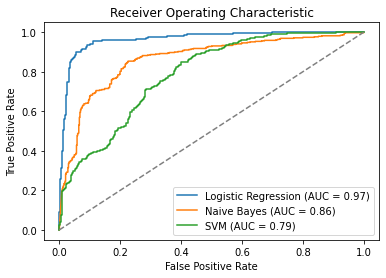

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#define features and labels
X = data.iloc[:, :-1]
labels = data["class"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Define classifiers
lr = LogisticRegression()
nb = MultinomialNB()
svm = SVC()

# Train classifiers
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Evaluate classifiers on test set
lr_score = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
nb_score = roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])
svm_score = roc_auc_score(y_test, svm.decision_function(X_test))

# Plot ROC-AUC curve for all models
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % lr_score)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.2f)' % nb_score)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % svm_score)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


Confusion matrix for LogisticRegression:
[[501  30]
 [ 38 352]]
Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       531
           1       0.92      0.90      0.91       390

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



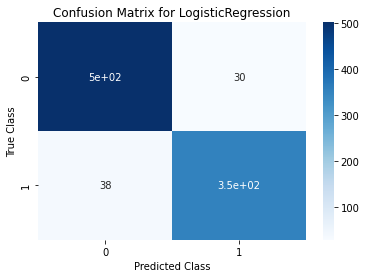

Confusion matrix for MultinomialNB:
[[445  86]
 [111 279]]
Classification report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       531
           1       0.76      0.72      0.74       390

    accuracy                           0.79       921
   macro avg       0.78      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921



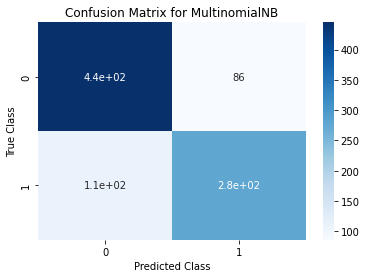

Confusion matrix for SVC:
[[448  83]
 [228 162]]
Classification report for SVC:
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       531
           1       0.66      0.42      0.51       390

    accuracy                           0.66       921
   macro avg       0.66      0.63      0.63       921
weighted avg       0.66      0.66      0.64       921



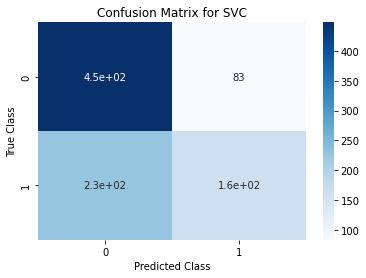

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate classifiers on test set
models = [lr, nb, svm]
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    print(f"Confusion matrix for {model.__class__.__name__}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification report for {model.__class__.__name__}:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()